<a href="https://colab.research.google.com/github/KP-iO/Learning-NLP/blob/main/2)Building%20text%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying News Headlines

This notebook explains the classification of news headlines as sarcastic and non-sarcastic. We are using the same headlines data as used before.


In [8]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.9.2


## Downloading the News Headlines data

In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [10]:
##read the the json file using pandas
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [12]:
##store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

## Set the parameters

In [13]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Splitting the training and testing set

In [14]:
##sentences
# Go from zero to the training size
training_sentences = headlines[0:training_size]
# Go from training size to the emd of the array.
testing_sentences = headlines[training_size:]

##labels
# Go from zero to the training size
training_labels = labels[0:training_size]
# Go from training size to the emd of the array.
testing_labels = labels[training_size:]

## Preprocess sentences
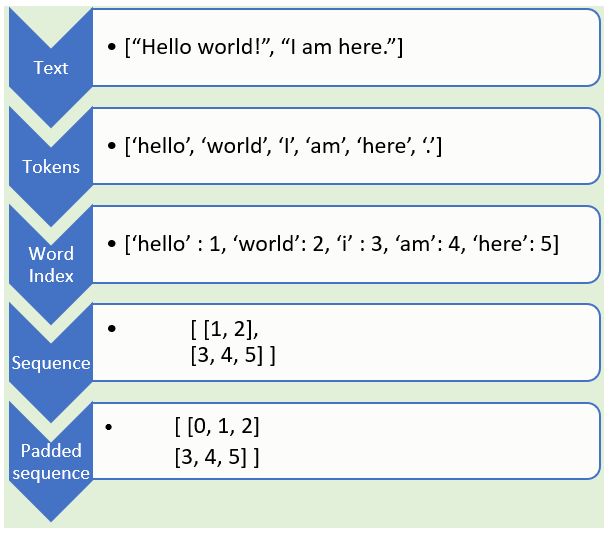


In [18]:
# Use tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# train tokenizer on training sentences
tokenizer.fit_on_texts(training_sentences)
# Get the index of the tokenizer 
# "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value
word_index = tokenizer.word_index
# turn texts into sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# pad the training sentences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# turn texts into sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# pad the training sentences
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Define the neural network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Train the model

Save it into history

In [22]:
num_epochs = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6793 - accuracy: 0.5612 - val_loss: 0.6213 - val_accuracy: 0.7358 - 4s/epoch - 7ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4723 - accuracy: 0.8151 - val_loss: 0.3932 - val_accuracy: 0.8337 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3340 - accuracy: 0.8663 - val_loss: 0.3486 - val_accuracy: 0.8510 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2792 - accuracy: 0.8909 - val_loss: 0.3338 - val_accuracy: 0.8559 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.2428 - accuracy: 0.9074 - val_loss: 0.3353 - val_accuracy: 0.8550 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 3s - loss: 0.2143 - accuracy: 0.9181 - val_loss: 0.3456 - val_accuracy: 0.8518 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1917 - accuracy: 0.9275 - val_loss: 0.3412 - val_accuracy: 0.8552 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1737 - accuracy: 0.9357 - val_loss: 0.3523 - val_accuracy: 0.8539 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

## Visualise the train & validation accuracy and loss

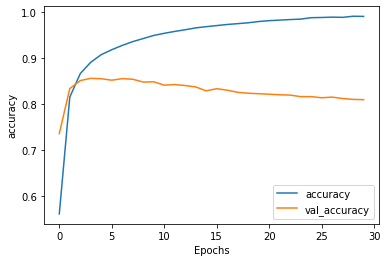

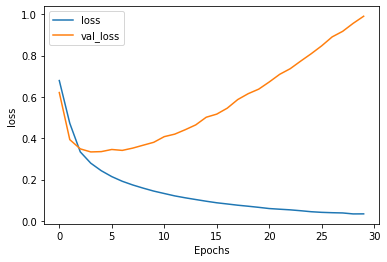

In [23]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [25]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# Result shows if its sarcastic or not 
print(model.predict(padded_seqs))

1/1 [==============================] - 0s 18ms/step
[[1.0830174e-05]
 [1.5636914e-06]]
